# Imports

In [1]:
import numpy  as np
import pandas as pd

from dstoolkit.modeling import automl_lgbm_regressor_cv, automl_lgbm_regressor

from sklearn.datasets        import load_diabetes
from sklearn.model_selection import train_test_split

/home/junior/.venv/dstoolkit/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Functions

In [2]:
random_state = 42
np.random.seed(random_state)

pd.options.display.max_columns = None
pd.options.display.max_rows = 2000

In [3]:
def get_dimensions(df):

    print("Number of Rows: {}".format(df.shape[0]))
    print("NUmber of Cols: {}".format(df.shape[1]))

# Loading Datasets

In [4]:
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)
df = pd.concat([X, y], axis=1)

X = df.drop(columns='target')
y = df.loc[:, ['target']]

# Machine Learning

## LightGBM CV

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

--------> Standard Model
---------------> Modeling
---------------> Metrics
Cross Validation  R2: 0.38, MAE: 47.74, RMSE: 59.92, MAPE: 0.43, MedAE: 41.96
Test  Validation  R2: 0.51, MAE: 43.37, RMSE: 54.51, MAPE: 0.36, MedAE: 39.1

--------> Hyperparameter Tuning
---------------> Modeling
---------------> Metrics
Cross Validation  R2: 0.45, MAE: 47.21, RMSE: 56.87, MAPE: 0.43, MedAE: 44.07
Test  Validation  R2: 0.61, MAE: 38.53, RMSE: 48.69, MAPE: 0.34, MedAE: 31.37

--------> Feature Importance


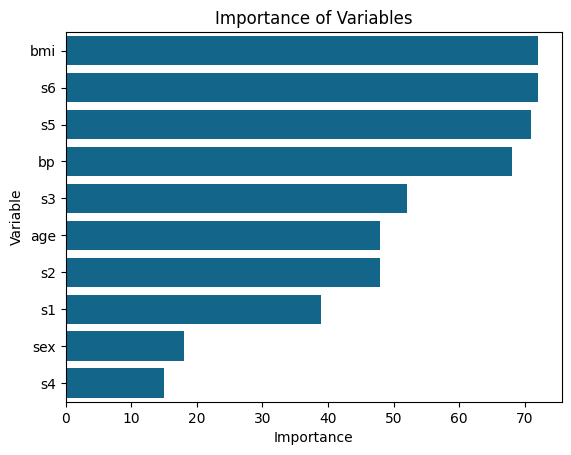


--------> Permutation Importance


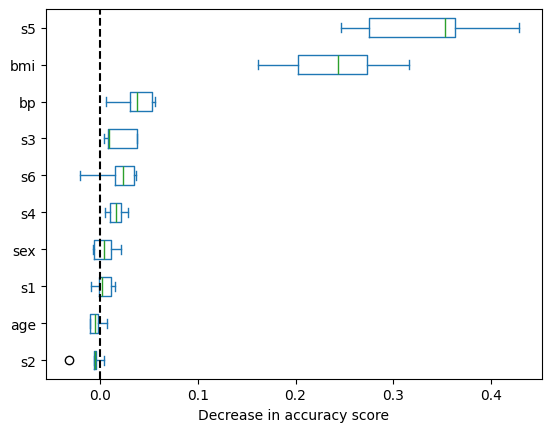


--------> Shap Values


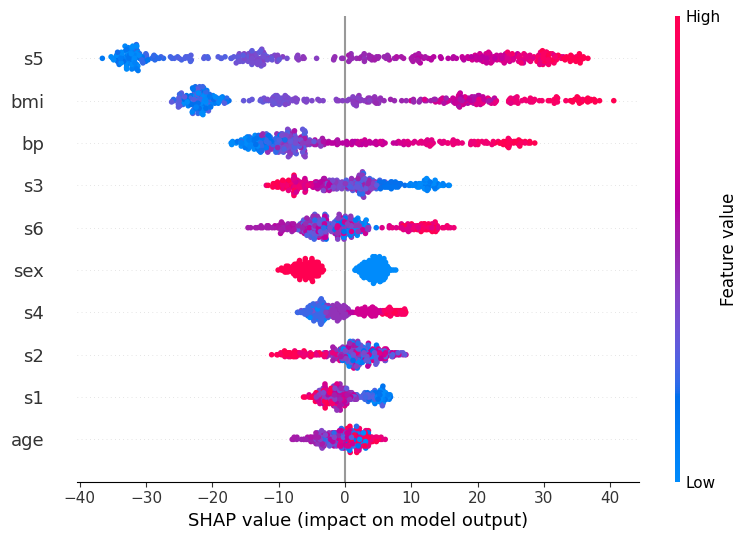

CPU times: user 31.4 s, sys: 2.83 s, total: 34.3 s
Wall time: 4.9 s


In [6]:
%%time
dict_results = automl_lgbm_regressor_cv(
    X_train, y_train, X_test, y_test, selection_method=None, target='target', cv=3, n_trials=10, scoring='r2', direction='maximize')

## Simple

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.4, random_state=42)

--------> Standard Model
---------------> Modeling
---------------> Metrics
Training    R2: 0.92, MAE: 17.15, RMSE: 21.99, MAPE: 0.15, MedAE: 12.86
Validation  R2: 0.36, MAE: 47.41, RMSE: 59.96, MAPE: 0.41, MedAE: 37.48
Testing     R2: 0.44, MAE: 43.7, RMSE: 54.92, MAPE: 0.4, MedAE: 36.63

--------> Hyperparameter Tuning
---------------> Modeling
---------------> Metrics
Training    R2: 0.52, MAE: 45.05, RMSE: 53.89, MAPE: 0.39, MedAE: 40.63
Validation  R2: 0.48, MAE: 42.08, RMSE: 54.13, MAPE: 0.4, MedAE: 32.85
Testing     R2: 0.47, MAE: 44.58, RMSE: 53.13, MAPE: 0.41, MedAE: 41.35

--------> Feature Importance


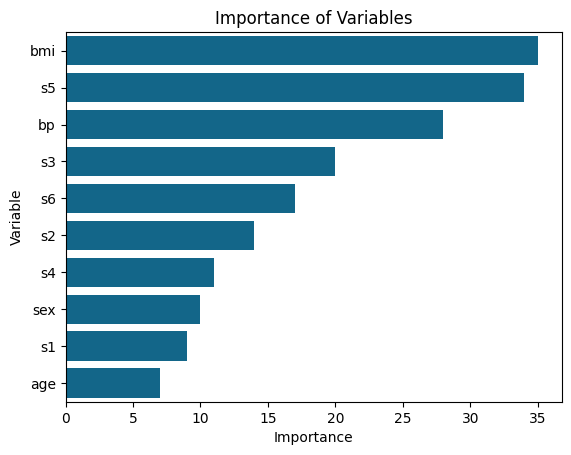


--------> Permutation Importance


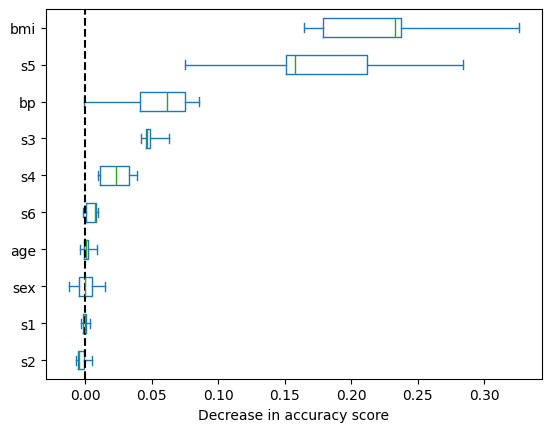


--------> Shap Values


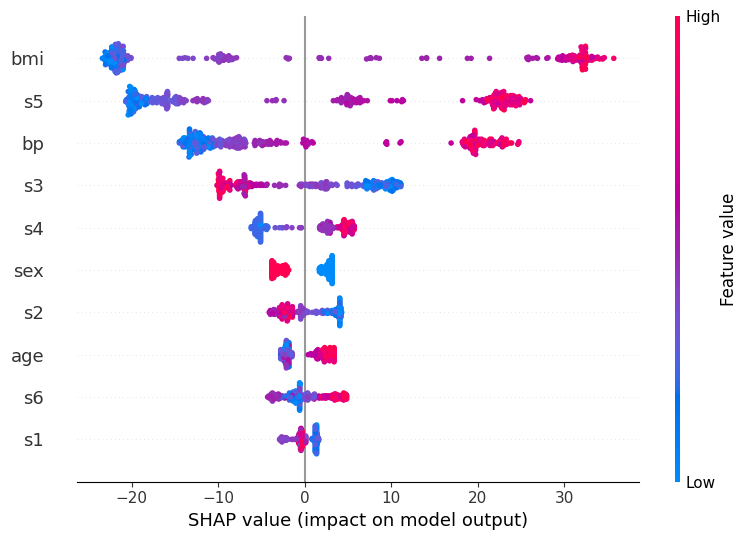

In [10]:
dict_results = automl_lgbm_regressor(
    X_train, y_train, X_valid, y_valid, X_test, y_test, selection_method=None, target='target', n_trials=10, scoring='r2', direction='maximize')